### Part 1: Cluster Analysis

In [63]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(data, name):
    le = preprocessing.LabelEncoder()
    data[name] = le.fit_transform(data[name])
    return le.classes_

KMeans Implementation

In [20]:
import pandas as pd
imdb_dataset = pd.read_csv("./imdb_dataset.csv")
imdb_dataset

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


## Vertical Partioning

In [21]:
db = imdb_dataset[["title", "genre", "mpaa_rating", "critics_rating"]]
db

,title,genre,mpaa_rating,critics_rating
0,Filly Brown,Drama,R,Rotten
1,The Dish,Drama,PG-13,Certified Fresh
2,Waiting for Guffman,Comedy,R,Certified Fresh
3,The Age of Innocence,Drama,PG,Certified Fresh
4,Malevolence,Horror,R,Rotten
...,...,...,...,...
646,Death Defying Acts,Drama,PG,Rotten
647,Half Baked,Comedy,R,Rotten
648,Dance of the Dead,Action & Adventure,R,Fresh
649,Around the World in 80 Days,Action & Adventure,PG,Rotten


In [22]:
db2 = imdb_dataset[["title", "imdb_rating", "critics_score", "audience_score"]]
db2

,title,imdb_rating,critics_score,audience_score
0,Filly Brown,5.5,45,73
1,The Dish,7.3,96,81
2,Waiting for Guffman,7.6,91,91
3,The Age of Innocence,7.2,80,76
4,Malevolence,5.1,33,27
...,...,...,...,...
646,Death Defying Acts,5.9,44,26
647,Half Baked,6.7,29,81
648,Dance of the Dead,5.9,80,52
649,Around the World in 80 Days,5.8,31,34


K-Cluster

In [46]:
from sklearn import cluster

data = db2.drop('title',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=db2.title, columns=['Cluster ID'])

c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Cluster ID
title,
Filly Brown,1
The Dish,0
Waiting for Guffman,0
The Age of Innocence,0
Malevolence,1
...,...
Death Defying Acts,1
Half Baked,1
Dance of the Dead,0


In [47]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,imdb_rating,critics_score,audience_score
0,7.165363,79.547486,75.164804
1,5.671672,30.979522,46.720137


In [55]:
import numpy as np

testData = np.array(db2[["imdb_rating", "critics_score", "audience_score"]].values)
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
titles = np.array(db2['title']).reshape(-1,1)
cols = db2.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((titles, testData, labels), axis=1),columns=cols)
newusers

c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,title,imdb_rating,critics_score,audience_score,Cluster ID
0,Filly Brown,5.5,45.0,73.0,1
1,The Dish,7.3,96.0,81.0,0
2,Waiting for Guffman,7.6,91.0,91.0,0
3,The Age of Innocence,7.2,80.0,76.0,0
4,Malevolence,5.1,33.0,27.0,1
...,...,...,...,...,...
646,Death Defying Acts,5.9,44.0,26.0,1
647,Half Baked,6.7,29.0,81.0,1
648,Dance of the Dead,5.9,80.0,52.0,0
649,Around the World in 80 Days,5.8,31.0,34.0,1


c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sho85\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'SSE')

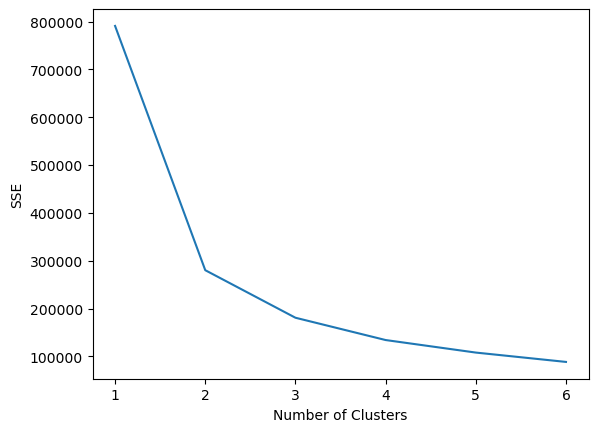

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Analysis

In [87]:
import pandas as pd

imdb_dataset = pd.read_csv("./imdb_dataset.csv")
imdb_dataset

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


## Single Link

In [88]:
encode_text_index(imdb_dataset, 'title_type')
encode_text_index(imdb_dataset, 'mpaa_rating')
encode_text_index(imdb_dataset, 'critics_rating')
encode_text_index(imdb_dataset, 'audience_rating')
encode_text_index(imdb_dataset, 'best_pic_nom')
encode_text_index(imdb_dataset, 'best_pic_win')
encode_text_index(imdb_dataset, 'best_actor_win')
encode_text_index(imdb_dataset, 'best_actress_win')
encode_text_index(imdb_dataset, 'best_dir_win')
encode_text_index(imdb_dataset, 'top200_box')
imdb_dataset

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,1,Drama,80.0,4,Indomina Media Inc.,2013,4,19,...,0,0,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,1,Drama,101.0,3,Warner Bros. Pictures,2001,3,14,...,0,0,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,1,Comedy,84.0,4,Sony Pictures Classics,1996,8,21,...,0,0,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,1,Drama,139.0,2,Columbia Pictures,1993,10,1,...,1,0,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,1,Horror,90.0,4,Anchor Bay Entertainment,2004,9,10,...,0,0,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,1,Drama,97.0,2,Genius Productions,2008,7,11,...,0,0,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,1,Comedy,82.0,4,Universal Pictures,1998,1,16,...,0,0,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,1,Action & Adventure,87.0,4,Grindhouse Entertainment,2008,3,9,...,0,0,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,1,Action & Adventure,120.0,2,Buena Vista Pictures,2004,6,16,...,0,1,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


limiting the dataset so clustering plot is more readable

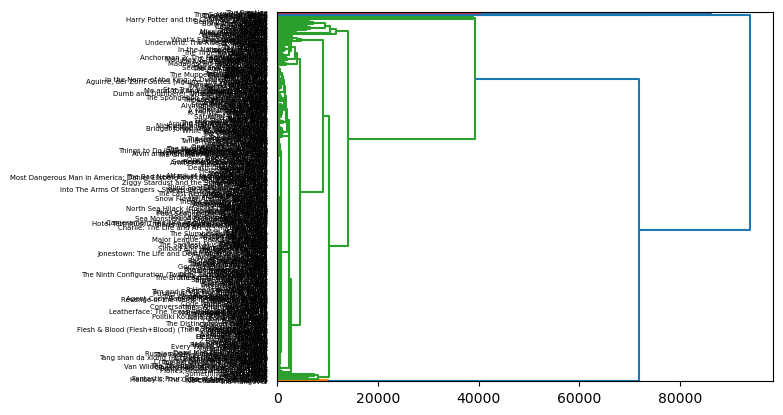

In [90]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = imdb_dataset['title']
Y = imdb_dataset['genre']
X = imdb_dataset.drop(['Unnamed: 0', 'title','genre', 'runtime', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day',
               'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'],axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## Complete Link

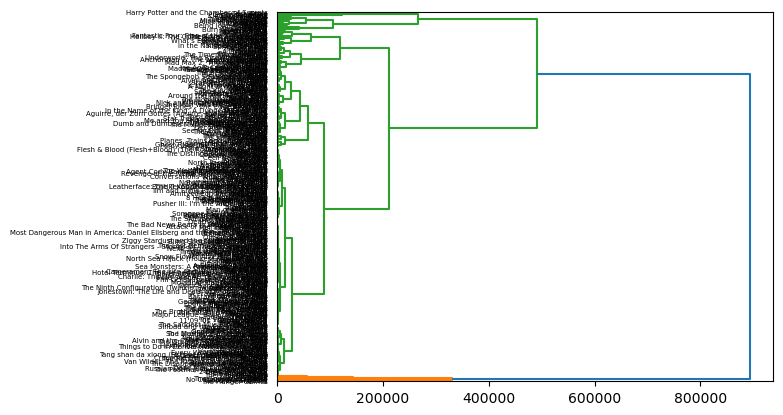

In [91]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## Group Average

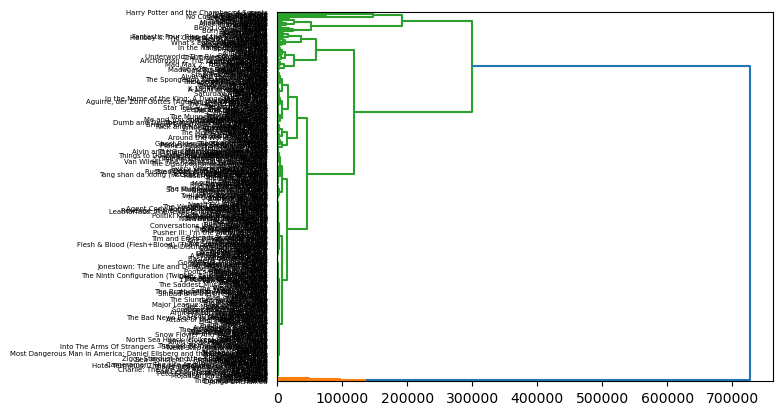

In [92]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Part 2: Text Mining

Count Vector Implementation

 Tfidf Vector Implementation

### Part 3:  Artificial Neural Network (ANN)

ANN Implementation